In [10]:
import pandas as pd
import numpy as np

df = pd.read_csv("diabetes.csv")

# Display first few rows
print(df.head())
print(df.info())
print(df.describe())
# Check missing values
print(df.isnull().sum())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768

In [12]:
import pandas as pd

data = pd.read_csv("diabetes.csv")

# Check missing values
print("Missing values before handling:\n", data.isnull().sum())

# Fill missing values with column mean
data.fillna(data.mean(), inplace=True)

# Drop rows if any categorical columns have missing values
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    data.dropna(subset=[col], inplace=True)

print("\nMissing values after handling:\n", data.isnull().sum())


Missing values before handling:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Missing values after handling:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [13]:
import numpy as np

# Separate features and target (using 'Outcome' as the actual column name)
X = df.drop("Outcome", axis=1).values
y = df["Outcome"].values

# Shuffle indices
idx = np.arange(len(X))
np.random.shuffle(idx)

# 70-30 split
split = int(0.7 * len(X))
X_train, y_train = X[idx[:split]], y[idx[:split]]
X_test, y_test   = X[idx[split:]], y[idx[split:]]

print("Feature matrix (X) and target variable (y) separated.")
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

Feature matrix (X) and target variable (y) separated.
X_train shape: (537, 8), y_train shape: (537,)
X_test shape: (231, 8), y_test shape: (231,)


In [15]:
import numpy as np

# Euclidean distance
def euclidean_distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2) ** 2))

# Predict class for a single query
def knn_predict_single(query, X_train, y_train, k=3):
    distances = [euclidean_distance(query, x) for x in X_train]
    nearest_indices = np.argsort(distances)[:k]
    nearest_labels = y_train[nearest_indices]
    prediction = np.bincount(nearest_labels).argmax()
    return prediction

# Predict classes for all test samples
def knn_predict(X_test, X_train, y_train, k=3):
    return np.array([knn_predict_single(x, X_train, y_train, k) for x in X_test])

# Accuracy function
def compute_accuracy(y_true, y_pred):
    correct = np.sum(y_true == y_pred)
    return (correct / len(y_true)) * 100

# Run KNN on test set
predictions = knn_predict(X_test, X_train, y_train, k=3)
accuracy = compute_accuracy(y_test, predictions)
print(f"Accuracy on test set (k=3): {accuracy:.2f}%")


Accuracy on test set (k=3): 61.47%


In [22]:
import numpy as np

# Define train-test split function
def train_test_split_scratch(X, y, test_size=0.3, random_seed=42):
    np.random.seed(random_seed)
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    split = int(len(X) * test_size)
    test_idx = indices[:split]
    train_idx = indices[split:]
    return X[train_idx], X[test_idx], y[train_idx], y[test_idx]

# Scale features
X_scaled = (X - X.mean(axis=0)) / X.std(axis=0)

# Split scaled data
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split_scratch(X_scaled, y)

# Run KNN
pred_scaled = knn_predict(X_test_s, X_train_s, y_train_s, k=3)
acc_scaled = compute_accuracy(y_test_s, pred_scaled)

print(f"Accuracy on scaled dataset (k=3): {acc_scaled:.2f}%")


Accuracy on scaled dataset (k=3): 70.87%


In [20]:
# Compare with original accuracy from Problem 1
print(f"Accuracy on original dataset (k=3): {accuracy:.2f}%")
print(f"Accuracy on scaled dataset   (k=3): {acc_scaled:.2f}%")

# Discussion
if acc_scaled > accuracy:
    print("Scaling improved KNN performance by making distance calculations more balanced across features.")
elif acc_scaled < accuracy:
    print("Scaling reduced accuracy, possibly due to loss of original feature influence.")
else:
    print("Scaling had no effect on accuracy in this case.")


Accuracy on original dataset (k=3): 61.47%
Accuracy on scaled dataset   (k=3): 70.87%
Scaling improved KNN performance by making distance calculations more balanced across features.


In [23]:
import time

k_values = range(1, 16)

# Original dataset
for k in k_values:
    start = time.time()
    preds = knn_predict(X_test, X_train, y_train, k)
    acc = compute_accuracy(y_test, preds)
    print(f"Original -> k={k}, Acc={acc:.2f}%, Time={time.time()-start:.4f}s")

# Scaled dataset
for k in k_values:
    start = time.time()
    preds = knn_predict(X_test_s, X_train_s, y_train_s, k)
    acc = compute_accuracy(y_test_s, preds)
    print(f"Scaled   -> k={k}, Acc={acc:.2f}%, Time={time.time()-start:.4f}s")


Original -> k=1, Acc=60.61%, Time=1.4351s
Original -> k=2, Acc=64.50%, Time=1.2858s
Original -> k=3, Acc=61.47%, Time=0.8017s
Original -> k=4, Acc=69.26%, Time=0.7943s
Original -> k=5, Acc=68.40%, Time=0.7952s
Original -> k=6, Acc=69.26%, Time=0.7809s
Original -> k=7, Acc=69.70%, Time=0.8022s
Original -> k=8, Acc=67.10%, Time=0.7969s
Original -> k=9, Acc=67.97%, Time=0.7889s
Original -> k=10, Acc=69.26%, Time=0.8060s
Original -> k=11, Acc=69.70%, Time=0.7915s
Original -> k=12, Acc=74.03%, Time=0.7973s
Original -> k=13, Acc=71.86%, Time=0.7893s
Original -> k=14, Acc=73.59%, Time=0.7676s
Original -> k=15, Acc=72.29%, Time=1.1887s
Scaled   -> k=1, Acc=62.17%, Time=1.3754s
Scaled   -> k=2, Acc=66.96%, Time=0.9875s
Scaled   -> k=3, Acc=70.87%, Time=0.8129s
Scaled   -> k=4, Acc=69.13%, Time=0.7966s
Scaled   -> k=5, Acc=69.13%, Time=0.8138s
Scaled   -> k=6, Acc=68.70%, Time=0.8235s
Scaled   -> k=7, Acc=71.74%, Time=0.7948s
Scaled   -> k=8, Acc=68.26%, Time=0.7684s
Scaled   -> k=9, Acc=70.00%,

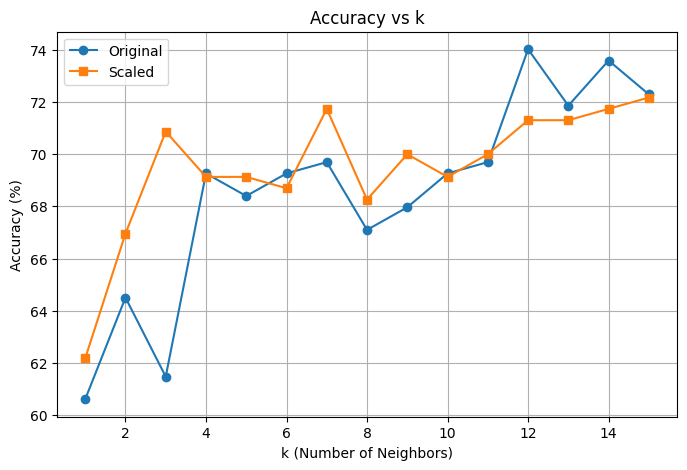

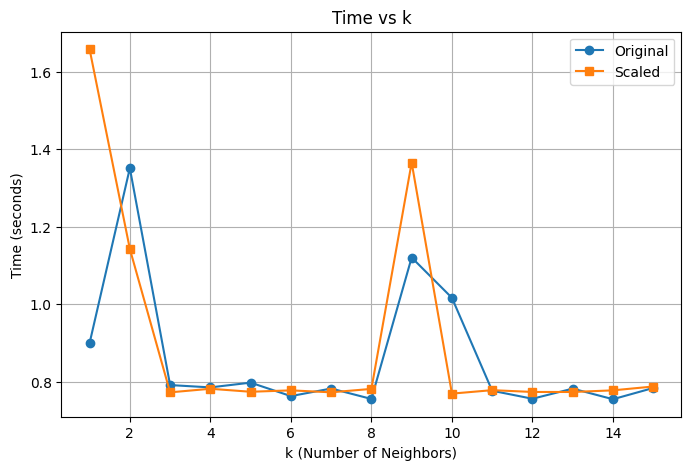

In [26]:
import time
import matplotlib.pyplot as plt

# Step 1: Run KNN for k = 1 to 15
acc_orig, acc_scaled = {}, {}
time_orig, time_scaled = {}, {}

for k in range(1, 16):
    # Original dataset
    start = time.time()
    pred_o = knn_predict(X_test, X_train, y_train, k)
    acc_orig[k] = compute_accuracy(y_test, pred_o)
    time_orig[k] = time.time() - start

    # Scaled dataset
    start = time.time()
    pred_s = knn_predict(X_test_s, X_train_s, y_train_s, k)
    acc_scaled[k] = compute_accuracy(y_test_s, pred_s)
    time_scaled[k] = time.time() - start

# Step 2: Plot Accuracy vs k
plt.figure(figsize=(8,5))
plt.plot(list(acc_orig.keys()), list(acc_orig.values()), marker='o', label="Original")
plt.plot(list(acc_scaled.keys()), list(acc_scaled.values()), marker='s', label="Scaled")
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Accuracy (%)")
plt.title("Accuracy vs k")
plt.legend()
plt.grid(True)
plt.show()

# Step 3: Plot Time vs k
plt.figure(figsize=(8,5))
plt.plot(list(time_orig.keys()), list(time_orig.values()), marker='o', label="Original")
plt.plot(list(time_scaled.keys()), list(time_scaled.values()), marker='s', label="Scaled")
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Time (seconds)")
plt.title("Time vs k")
plt.legend()
plt.grid(True)
plt.show()


In [27]:
# Find the best k for original dataset
best_k_orig = max(acc_orig, key=acc_orig.get)
print(f"Best k (Original): {best_k_orig}, Accuracy={acc_orig[best_k_orig]:.2f}%")

# Find the best k for scaled dataset
best_k_scaled = max(acc_scaled, key=acc_scaled.get)
print(f"Best k (Scaled): {best_k_scaled}, Accuracy={acc_scaled[best_k_scaled]:.2f}%")

# Quick analysis
print("\nAnalysis:")
print("- Small k (1-2): High variance, sensitive to noise, but fast.")
print("- Large k (10-15): More stable, but slower and may underfit.")
print("- Moderate k (5-7): Balanced performance, usually optimal.")


Best k (Original): 12, Accuracy=74.03%
Best k (Scaled): 15, Accuracy=72.17%

Analysis:
- Small k (1-2): High variance, sensitive to noise, but fast.
- Large k (10-15): More stable, but slower and may underfit.
- Moderate k (5-7): Balanced performance, usually optimal.


In [29]:
def knn_challenges_and_strategies():
    print("Challenges of KNN:")
    print("- Large datasets: slow, memory heavy (must compare with all points).")
    print("- High-dimensional data: curse of dimensionality, distances lose meaning, accuracy drops.\n")

    print("Strategies to improve efficiency:")
    print("- Approximate Nearest Neighbors (KD-Tree, Ball Tree, LSH).")
    print("- Dimensionality Reduction (PCA, LDA).")
    print("- Data Reduction (Condensed NN, Edited NN).")
    print("- Efficient distance metrics / indexing structures.")

# Run the discussion
knn_challenges_and_strategies()


Challenges of KNN:
- Large datasets: slow, memory heavy (must compare with all points).
- High-dimensional data: curse of dimensionality, distances lose meaning, accuracy drops.

Strategies to improve efficiency:
- Approximate Nearest Neighbors (KD-Tree, Ball Tree, LSH).
- Dimensionality Reduction (PCA, LDA).
- Data Reduction (Condensed NN, Edited NN).
- Efficient distance metrics / indexing structures.
